# Technical Analysis with Crypto

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import ta

# Datetime
import datetime as dt
from datetime import datetime
from datetime import timedelta

In [2]:
# Define the symbol, start and end dates, and interval
symbol = 'BTC-USD' 
start_date = '2020-01-01' 
end_date = datetime.today().strftime('%Y-%m-%d')
interval = '1d'


In [3]:
# Fetch historical data using yfinance
df = yf.download(symbol, start=start_date, end=end_date, interval=interval)

[*********************100%%**********************]  1 of 1 completed


In [4]:
# The DataFrame already has the Timestamp as the index, so no need to set it again
# If you want to rename the columns to match the original DataFrame format
# df.rename(columns={'Open': 'Open', 'High': 'High', 'Low': 'Low', 'Close': 'Close', 'Volume': 'Volume'}, inplace=True)

In [5]:
# Display the DataFrame
print(df)

                    Open          High           Low         Close  \
Date                                                                 
2020-01-01   7194.892090   7254.330566   7174.944336   7200.174316   
2020-01-02   7202.551270   7212.155273   6935.270020   6985.470215   
2020-01-03   6984.428711   7413.715332   6914.996094   7344.884277   
2020-01-04   7345.375488   7427.385742   7309.514160   7410.656738   
2020-01-05   7410.451660   7544.497070   7400.535645   7411.317383   
...                  ...           ...           ...           ...   
2024-08-19  58480.710938  59612.660156  57864.710938  59493.453125   
2024-08-20  59493.453125  61396.328125  58610.882812  59012.792969   
2024-08-21  59014.988281  61834.351562  58823.445312  61175.191406   
2024-08-22  61168.316406  61408.109375  59815.253906  60381.914062   
2024-08-23  60380.953125  64947.062500  60372.050781  64094.355469   

               Adj Close       Volume  
Date                                   
2020-01-0

In [6]:
# MACD & AO Indicators
# Calculating the MACD Line, Signal Line and Histogram
# Calculate MACD Line, Signal Line and MACD Histogram 

macd = ta.trend.MACD(df['Close'])
df['macd_line'] = macd.macd() # MACD Line
df['macd_signal'] = macd.macd_signal() # Signal Line
df['macd_hist'] = macd.macd_diff() # MACD Histogram (MACD Line - Signal Line)

In [7]:
# Calculate Awesome Oscillator
ao = ta.momentum.AwesomeOscillatorIndicator(df['High'], df['Low']) 
df['ao'] = ao.awesome_oscillator() # Awesome Oscillator
df

,Open,High,Low,Close,Adj Close,Volume,macd_line,macd_signal,macd_hist,ao
Date,,,,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997,NaN,NaN,NaN,NaN
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,NaN,NaN,NaN,NaN
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,NaN,NaN,NaN,NaN
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275,NaN,NaN,NaN,NaN
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-08-19,58480.710938,59612.660156,57864.710938,59493.453125,59493.453125,25911207712,-1071.172542,-1147.066778,75.894236,-3668.995565
2024-08-20,59493.453125,61396.328125,58610.882812,59012.792969,59012.792969,31613400008,-1019.951491,-1121.643720,101.692230,-3121.892670
2024-08-21,59014.988281,61834.351562,58823.445312,61175.191406,61175.191406,32731154072,-795.698638,-1056.454704,260.756066,-2638.718118


In [8]:
# Drop NaN values
df.dropna(inplace=True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1664 entries, 2020-02-03 to 2024-08-23
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         1664 non-null   float64
 1   High         1664 non-null   float64
 2   Low          1664 non-null   float64
 3   Close        1664 non-null   float64
 4   Adj Close    1664 non-null   float64
 5   Volume       1664 non-null   int64  
 6   macd_line    1664 non-null   float64
 7   macd_signal  1664 non-null   float64
 8   macd_hist    1664 non-null   float64
 9   ao           1664 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 143.0 KB


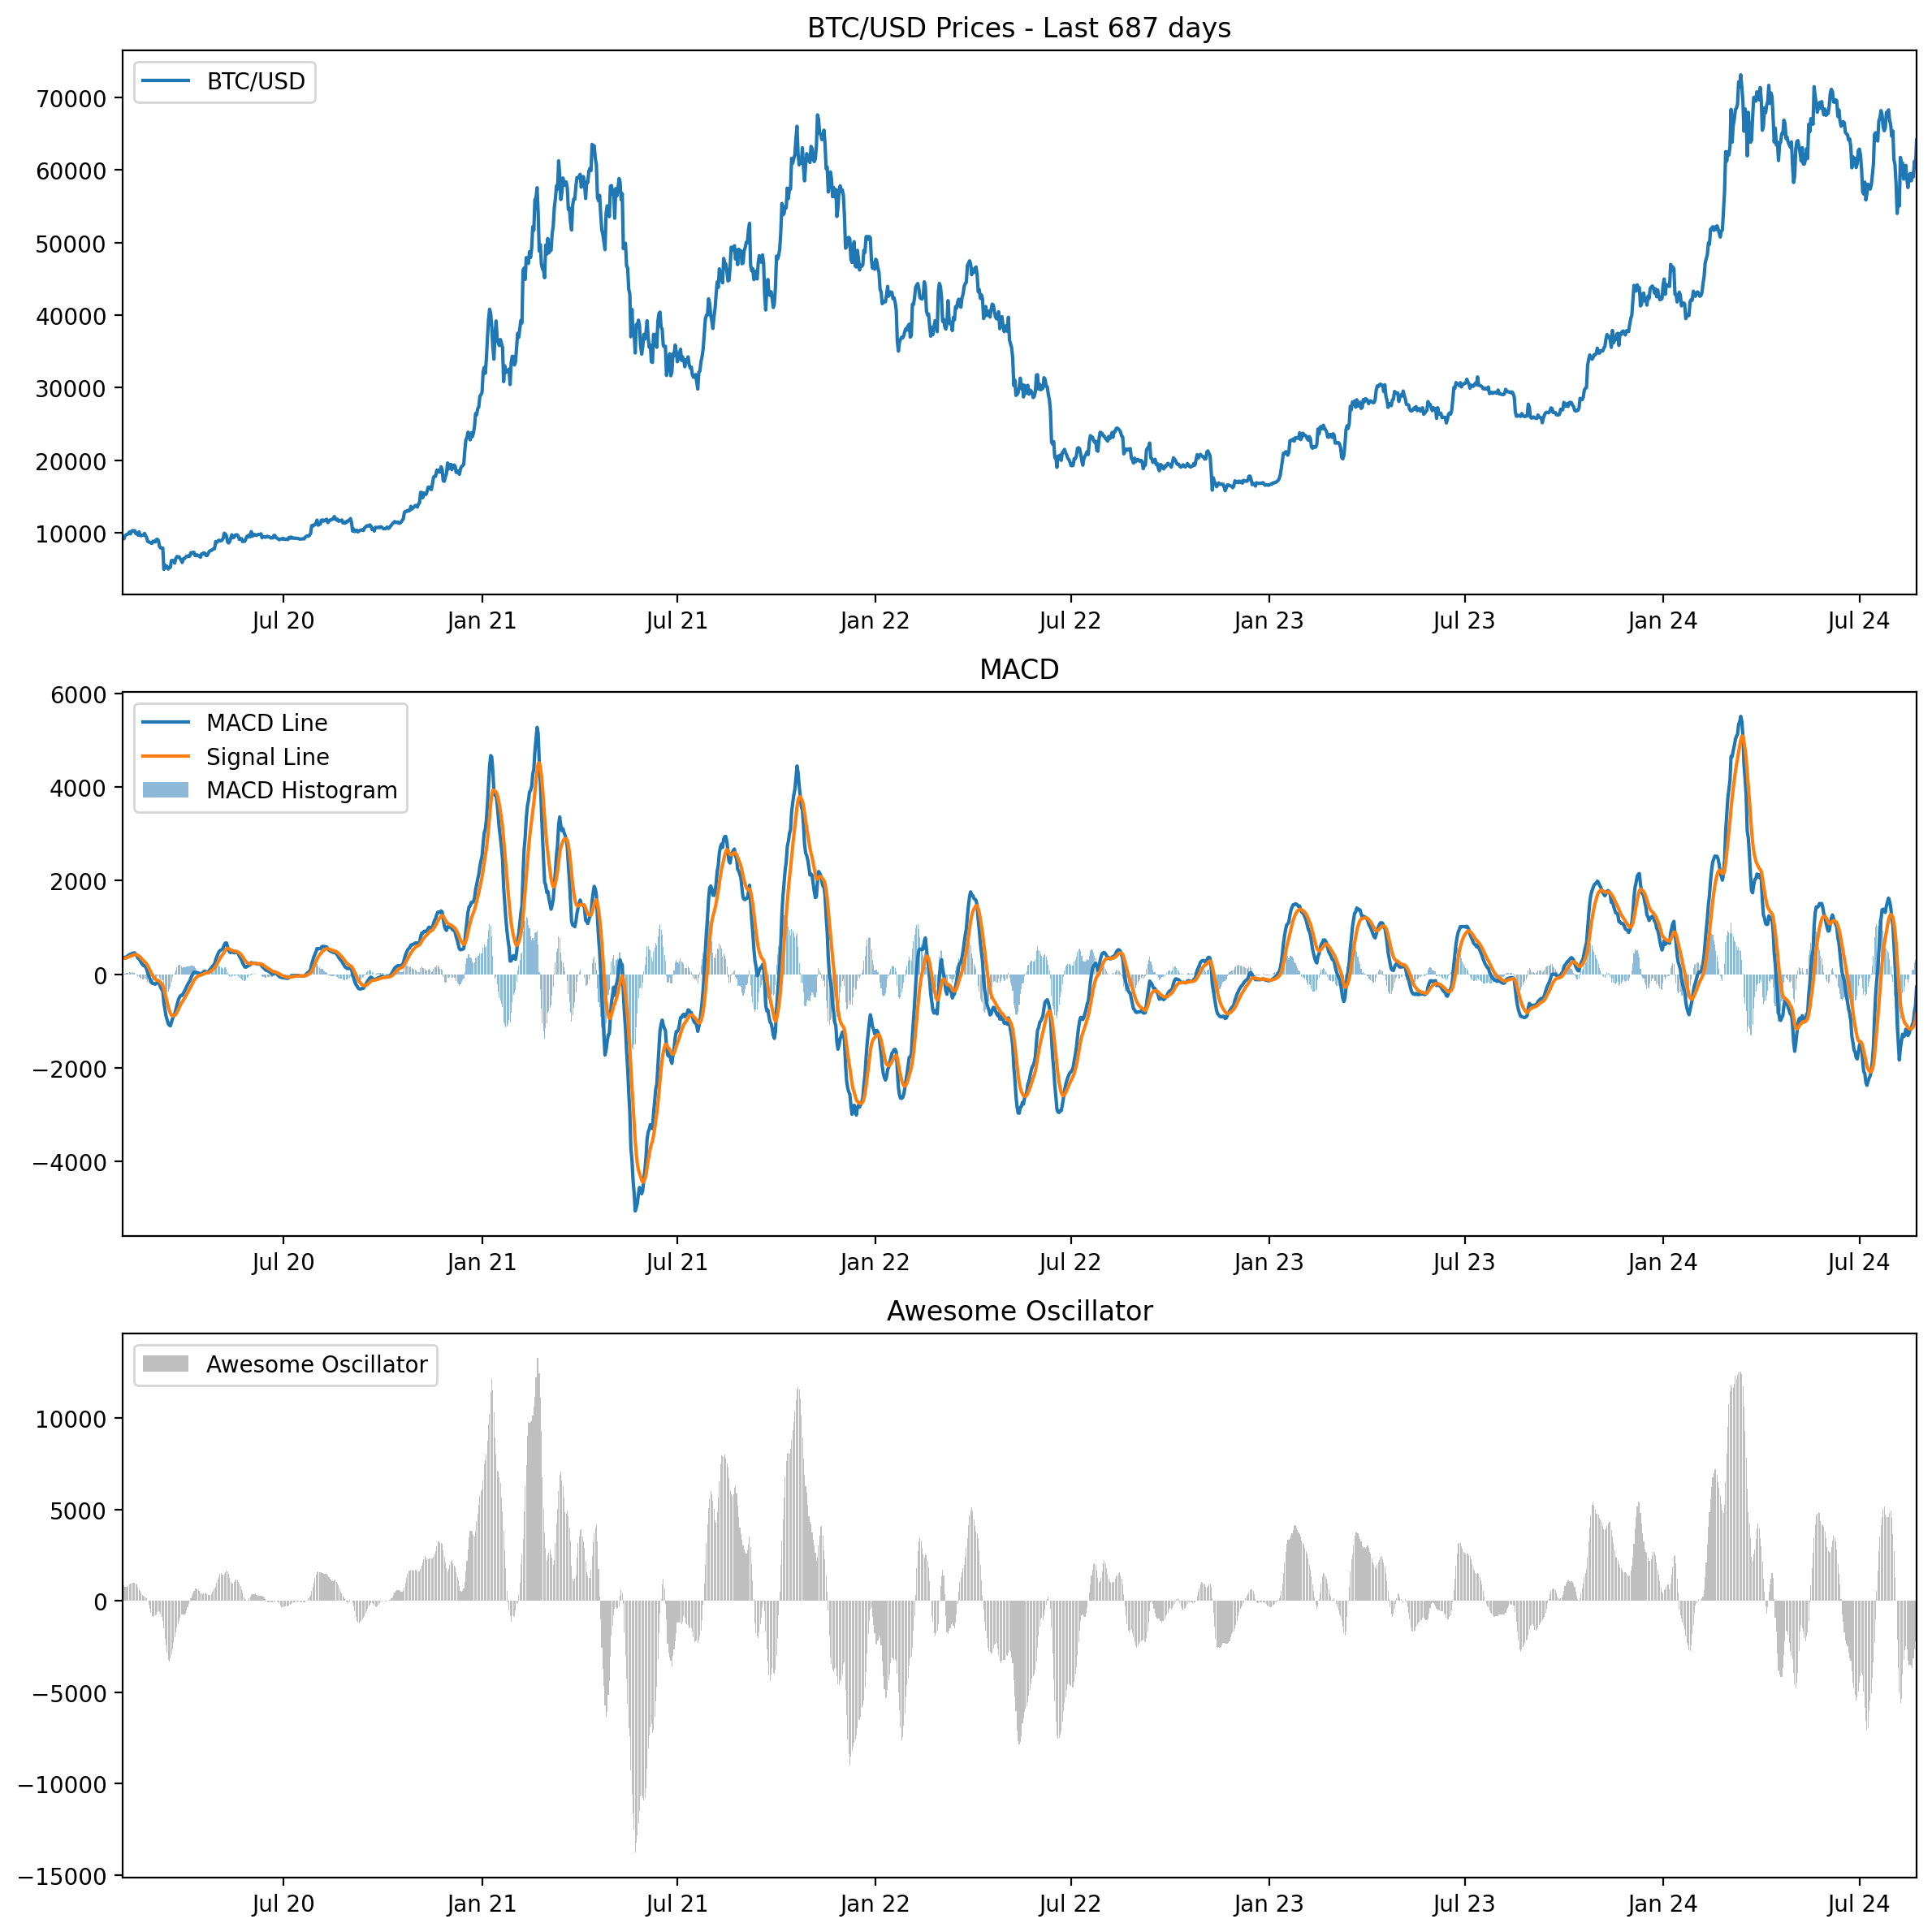

In [9]:
# Plotting the BTC-USD Close price, the MACD and AO indicators
fig, ax = plt.subplots(3, figsize=(12,12), dpi=200)

# Plot BTC prices
ax[0].plot(df.index, df['Close'], label='BTC/USD') 
ax[0].set_title('BTC/USD Prices - Last 687 days') 
ax[0].legend(loc='upper left') 
ax[0].set_xlim([df.index.min(), df.index.max()]) 
#ax[0].grid()

# Plot MACD Line, Signal Line and Histogram
ax[1].plot(df.index, df['macd_line'], label='MACD Line') # Plot MACD Line and Signal Line 
ax[1].plot(df.index, df['macd_signal'], label='Signal Line') # Plot MACD Line and Signal Line 
ax[1].bar(df.index, df['macd_hist'], alpha=0.5, label='MACD Histogram') # Plot MACD Histogram as bar plot 
ax[1].set_title('MACD')
ax[1].legend(loc='upper left')
ax[1].set_xlim([df.index.min(), df.index.max()])
#ax[1].grid()

# Plot Awesome Oscillator
ax[2].bar(df.index, df['ao'], alpha=0.5, label='Awesome Oscillator', color='gray') 
ax[2].set_title('Awesome Oscillator')
ax[2].legend(loc='upper left') 
ax[2].set_xlim([df.index.min(), df.index.max()]) 
#ax[2].grid()

# Set date format
date_format = mdates.DateFormatter('%b %y') 
ax[0].xaxis.set_major_formatter(date_format) 
ax[1].xaxis.set_major_formatter(date_format) 
ax[2].xaxis.set_major_formatter(date_format)

# Show the plot
plt.tight_layout() 
plt.show()

In [10]:
# MACD/AO Trading Signals

# Generating the buy/sell trading signals

# Strategy 1
# Generating the buy "signal1"
df['signal1'] = np.where((df['macd_line'] > df['macd_signal']) & (df['ao'] > 0), 1, 0)
# Generating the "sell_signal1"
df['sell_signal1'] = np.where((df['macd_line'] < df['macd_signal']) & (df['ao'] < 0), 1, 0)

# Strategy 2
# Generating the buy "signal2"
df['signal2'] = np.where((df['macd_line'] > df['macd_signal']) & (df['macd_line'].shift() < df['macd_signal'].shift()) & (df['ao'] > 0) ,1,0)
# Generating the "sell_signal2"
df['sell_signal2'] = np.where((df['macd_line'] < df['macd_signal']) & (df['macd_line'].shift() > df['macd_signal'].shift()) & (df['ao'] < 0) ,1,0)

# Counting the buy/sell signals
num_signals1 = df['signal1'].sum() 
num_sells1 = df['sell_signal1'].sum()
num_signals2 = df['signal2'].sum() 
num_sells2 = df['sell_signal2'].sum()

print(f"Number of buy signals in Strategy 1: {num_signals1}")
print(f"Number of sell signals in Strategy 1: {num_sells1}")
print(f"Number of buy signals in Strategy 2: {num_signals2}")
print(f"Number of sell signals in Strategy 2: {num_sells2}")

Number of buy signals in Strategy 1: 534
Number of sell signals in Strategy 1: 474
Number of buy signals in Strategy 2: 17
Number of sell signals in Strategy 2: 16


In [11]:
# Plotting the buy/sell trading signals of Strategy 1 and a single buy signal of Strategy 2 to be neglected

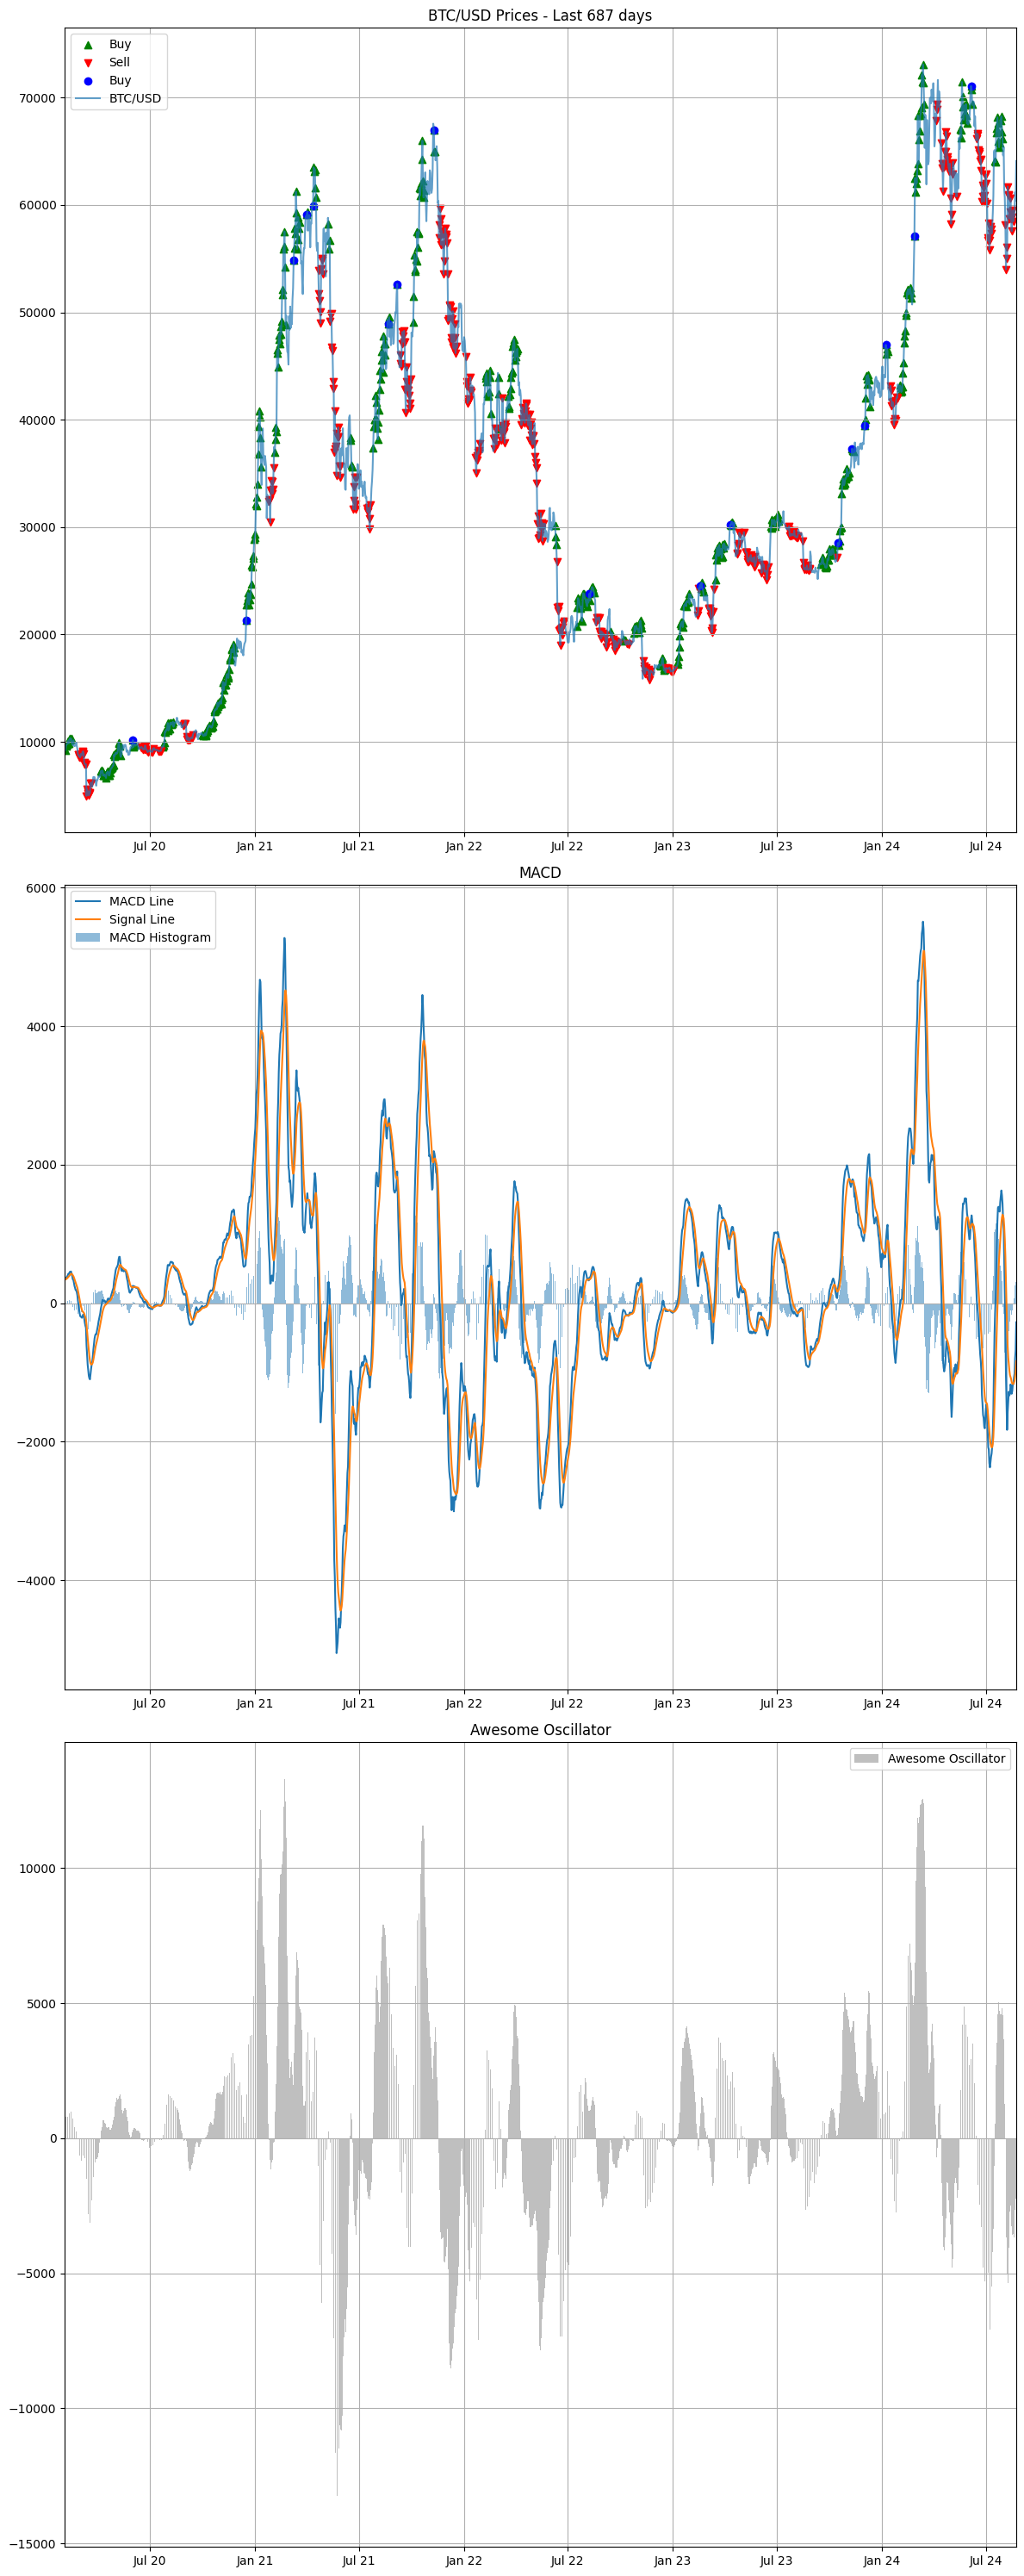

In [12]:
fig, ax = plt.subplots(3, figsize=(12, 30)) 

# Plot BTC prices

ax[0].scatter(df[df['signal1'] == 1].index, df[df['signal1'] == 1]['Close'], color='g', marker='^', label='Buy')
ax[0].scatter(df[df['sell_signal1'] == 1].index, df[df['sell_signal1'] == 1]['Close'], color='r', marker='v', label='Sell')
ax[0].scatter(df[df['signal2'] == 1].index, df[df['signal2'] == 1]['Close'], color='b', marker='o', label='Buy')
#ax[0].scatter(df[df['sell_signal2'] == 1].index, df[df['sell_signal2'] == 1]['Close'], s=100,color='orange', marker='v')
ax[0].plot(df.index, df['Close'], label='BTC/USD',alpha=0.7)
ax[0].set_title('BTC/USD Prices - Last 687 days') 
ax[0].legend()
ax[0].set_xlim([df.index.min(), df.index.max()]) 
ax[0].grid()

# Plot MACD Line, Signal Line and Histogram
ax[1].plot(df.index, df['macd_line'], label='MACD Line') 
ax[1].plot(df.index, df['macd_signal'], label='Signal Line') 
ax[1].bar(df.index, df['macd_hist'], alpha=0.5, label='MACD Histogram') 
ax[1].set_title('MACD')
ax[1].legend()
ax[1].set_xlim([df.index.min(), df.index.max()]) 
ax[1].grid()

# Plot Awesome Oscillator
ax[2].bar(df.index, df['ao'], alpha=0.5, label='Awesome Oscillator', color='gray') 
ax[2].set_title('Awesome Oscillator')
ax[2].legend()
ax[2].set_xlim([df.index.min(), df.index.max()])
ax[2].grid()

# Let's also set the appropriate date format
date_format = mdates.DateFormatter('%b %y') 
for a in ax:
    a.xaxis.set_major_formatter(date_format)
    
# Plot
plt.tight_layout() 
plt.show()